In [27]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import math

In [28]:
gdf = gpd.read_file('data/Advisory_Neighborhood_Commissions_from_2013.geojson')

<Axes: >

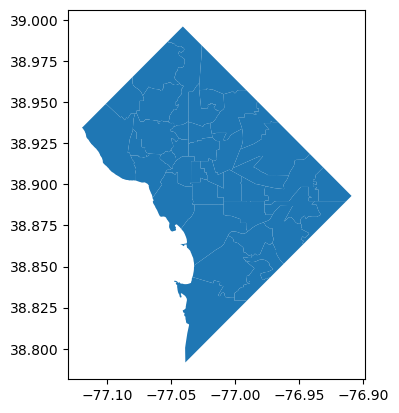

In [29]:
gdf.plot()

### Creating merged table of crime instances with accompanying polygon data

In [49]:
crime = pd.read_csv('data/dc_crime_add_vars.csv')

In [50]:
crime.rename(columns = {'ANC':'ANC_ID'}, inplace = True) 

In [51]:
merged = pd.merge(gdf, crime, on = 'ANC_ID')

In [52]:
merged.columns
type(merged)

geopandas.geodataframe.GeoDataFrame

In [53]:
merged.drop(columns = ['WEB_URL','CREATOR', 'CREATED', 'EDITOR',
       'EDITED', 'SHAPEAREA', 'SHAPELEN', 'Unnamed: 0', 'X',
       'REPORT_DAT', 'SHIFT', 'OFFENSE', 'METHOD', 'BLOCK', 'DISTRICT', 'PSA',
       'WARD', 'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'CCN', 'START_DATE', 'END_DATE', 'XBLOCK', 'YBLOCK',
       'optional', 'date', 'year', 'month', 'day', 'hour', 'minute', 'second',
       'EW', 'NS', 'quad', 'crimetype'], inplace = True)

In [54]:
merged.head(3)

,OBJECTID,ANC_ID,NAME,geometry
0,1,7C,ANC 7C,"POLYGON ((-76.93126 38.91024, -76.93130 38.910..."
1,1,7C,ANC 7C,"POLYGON ((-76.93126 38.91024, -76.93130 38.910..."
2,1,7C,ANC 7C,"POLYGON ((-76.93126 38.91024, -76.93130 38.910..."


In [36]:
merged_crime_counts = merged['ANC_ID'].value_counts()

In [37]:
merged_crime_counts.to_frame().head(3)

,count
ANC_ID,
2B,19513
1B,19339
1A,18012


In [38]:
anc_count_geo = pd.merge(merged_crime_counts, gdf[['ANC_ID', 'NAME', 'geometry']], how = 'left', left_index = True, right_on = 'ANC_ID', sort = True)

In [40]:
anc_count_geo = gpd.GeoDataFrame(anc_count_geo, geometry = 'geometry', crs = 4326)

In [46]:
anc_count_geo.head()

,count,ANC_ID,NAME,geometry
28,18012,1A,ANC 1A,"POLYGON ((-77.03523 38.93743, -77.03570 38.937..."
31,19339,1B,ANC 1B,"POLYGON ((-77.01935 38.92857, -77.01939 38.928..."
32,8100,1C,ANC 1C,"POLYGON ((-77.04642 38.92598, -77.04655 38.926..."
27,3524,1D,ANC 1D,"POLYGON ((-77.03645 38.93638, -77.03645 38.936..."
2,6575,2A,ANC 2A,"POLYGON ((-77.05445 38.90725, -77.05445 38.907..."


In [47]:
anc_count_geo.shape

(40, 4)

## Creating Choropleth map of crime by ANC

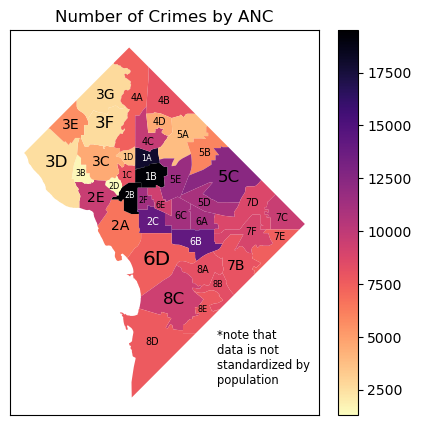

In [55]:
fig, ax = plt.subplots(figsize=(5,5))

anc_count_geo.plot(column='count', 
                         legend=True,  
                         cmap='magma_r',
                          ax = ax)


def adjust_label(x):

    default_adjustments = {'xy_shift': (0,0), 'fontsize': 'x-small', 'color': 'black'}
    specific_adjustments = {
        '1A': {'color':'white', 'xy_shift': (0, -0.002), 'fontsize': 'xx-small'},
        '1B': {'color':'white', 'xy_shift': (0, -0.002)},
        '1C': {'xy_shift': (0, -0.002), 'fontsize':'xx-small'},
        '1D': {'xy_shift': (0, -0.002), 'fontsize':'xx-small'},
        '2A': {'fontsize': 'medium'},
        '2B': {'color': 'white', 'fontsize': 'xx-small'},
        '2C': {'xy_shift': (0, -0.002), 'color': 'white'},
        '2D': {'xy_shift': (0, -0.002), 'fontsize': 'xx-small'},
        '2E': {'xy_shift': (0, -0.002), 'fontsize': 'medium'},
        '2F': {'xy_shift': (-0.001, -0.002), 'fontsize':'xx-small'},
        '3B': {'xy_shift': (0, -0.002), 'fontsize':'xx-small'},
        '3C': {'xy_shift': (0.001, -0.003), 'fontsize':'medium'},
        '3D': {'fontsize':'large'},
        '3E': {'xy_shift': (0, -0.002), 'fontsize':'medium'},
        '3F': {'fontsize':'large'},
        '3G': {'fontsize':'medium', 'xy_shift': (0, -0.004)},
        '4A': {'xy_shift': (0.003, -0.002)},
        '4B': {'xy_shift': (0, -0.003)},
        '4C': {'xy_shift': (0, -0.006)},
        '4D': {'xy_shift': (0, -0.001)},
        '5B': {'xy_shift': (0, -0.003)},
        '5C': {'fontsize': 'large', 'xy_shift': (0.004,-0.002)},
        '5D': {'xy_shift': (-0.004, -0.002)},
        '5E': {'xy_shift': (0, -0.003)},
        '6A': {'xy_shift': (0, -0.003)},
        '6B': {'xy_shift': (0, -0.002), 'color': 'white'},
        '6C': {'xy_shift': (0.001, -0.002)},
        '6D': {'xy_shift': (0, -0.003), 'fontsize': 'x-large'},
        '6E': {'xy_shift': (0, -0.004), 'fontsize': 'xx-small'},
        '7B': {'xy_shift': (0, -0.004), 'fontsize': 'medium'},
        '7C': {'xy_shift': (0, -0.003)},
        '7D': {'xy_shift': (0.003, 0.002)},
        '7E': {'xy_shift': (0.006, 0.004)},
        '7F': {'xy_shift': (0.003, 0)},
        '8A': {'xy_shift': (0, -0.002)},
        '8B': {'xy_shift': (0, 0.002), 'fontsize': 'xx-small'},
        '8C': {'xy_shift': (0, -0.003), 'fontsize': 'large'},
        '8E': {'fontsize': 'xx-small'},
    }

    if x['ANC_ID'] in specific_adjustments:
        specific_adjustment = specific_adjustments[x['ANC_ID']]
    else:
        specific_adjustment = {}

    combined_adjustment = {**default_adjustments, **specific_adjustment}

    xy_shift = combined_adjustment['xy_shift']
    fontsize = combined_adjustment['fontsize']
    color = combined_adjustment['color']

    ax.annotate(
        text=x['ANC_ID'], 
        xy=(x.geometry.centroid.coords[0][0] + xy_shift[0], x.geometry.centroid.coords[0][1] + xy_shift[1]),  # Apply position shift
        ha='center', 
        color=color,
        fontsize=fontsize
    )

anc_count_geo.apply(adjust_label, axis=1)
plt.title('Number of Crimes by ANC', fontsize = 'large')

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.text(-76.975, 38.8, '*note that \ndata is not \nstandardized by \npopulation', fontsize = 'small')

plt.show()
#fig.savefig('figures/NumCrimesANCNoLines.svg', bbox_inches='tight')

## Creating larger labels for ANCs that appear tiny on the initial map

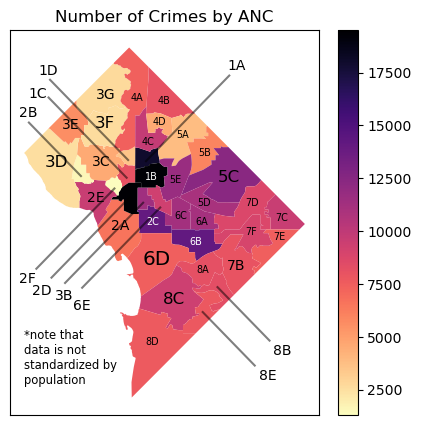

In [56]:
import math

#UR = Upper Right, UL = Upper Left, LL = Lower Left, LR = Lower Right
adj_UR = []
adj_UL = []
adj_LL = []
adj_LR = []

def adjust_UR(UR):
    for i in UR:
        (x1,y1) = i
    
        distance = 0.08
        slope = 0.8
        
        delta_x = math.sqrt(distance ** 2 / (1 + slope ** 2))
        delta_y = slope * delta_x
        x2 = x1 + delta_x
        y2 = y1 + delta_y
        new_coord = (x2,y2)
        adj_UR.append(new_coord)
    return adj_UR

def adjust_UL(UL):
    count = 0
    for i in UL:
        (x1,y1) = i

        if count == 2:
            distance = 0.05
        else:
            distance = 0.075
        slope = -0.8
        
        delta_x = -math.sqrt(distance ** 2 / (1 + slope ** 2))
        delta_y = slope * delta_x
        x2 = x1 + delta_x
        y2 = y1 + delta_y
        new_coord = (x2,y2)
        adj_UL.append(new_coord)
        count +=1
    return adj_UL

def adjust_LL(LL):
    for i in LL:
        (x1,y1) = i
    
        distance = 0.075
        slope = 0.8
        
        delta_x = -math.sqrt(distance ** 2 / (1 + slope ** 2))
        delta_y = slope * delta_x
        x2 = x1 + delta_x
        y2 = y1 + delta_y
        new_coord = (x2,y2)
        adj_LL.append(new_coord)
    return adj_LL

def adjust_LR(LR):
    for i in LR:
        (x1,y1) = i
    
        distance = -0.05
        slope = -0.8
        
        delta_x = math.sqrt(distance ** 2 / (1 + slope ** 2))
        delta_y = slope * delta_x
        x2 = x1 + delta_x
        y2 = y1 + delta_y
        new_coord = (x2,y2)
        adj_LR.append(new_coord)
    return adj_LR
#-------------------------------------------------
fig, ax = plt.subplots(figsize=(5,5))

anc_count_geo.plot(column='count', 
                         legend=True,  
                         cmap='magma_r',
                          ax = ax)

xxsmall_coords = []
def adjust_label(x):
    global xxsmall_coords

    default_adjustments = {'xy_shift': (0,0), 'fontsize': 'x-small', 'color': 'black'}
    specific_adjustments = {
        '1A': {'color':'white', 'xy_shift': (0, -0.002), 'fontsize': 'xx-small'},
        '1B': {'color':'white', 'xy_shift': (0, -0.002)},
        '1C': {'xy_shift': (0, -0.002), 'fontsize':'xx-small'},
        '1D': {'xy_shift': (0, -0.002), 'fontsize':'xx-small'},
        '2A': {'fontsize': 'medium'},
        '2B': {'color': 'white', 'fontsize': 'xx-small'},
        '2C': {'xy_shift': (0, -0.002), 'color': 'white'},
        '2D': {'xy_shift': (0, -0.002), 'fontsize': 'xx-small'},
        '2E': {'xy_shift': (0, -0.002), 'fontsize': 'medium'},
        '2F': {'xy_shift': (-0.001, -0.002), 'fontsize':'xx-small'},
        '3B': {'xy_shift': (0, -0.002), 'fontsize':'xx-small'},
        '3C': {'xy_shift': (0.001, -0.003), 'fontsize':'medium'},
        '3D': {'fontsize':'large'},
        '3E': {'xy_shift': (0, -0.002), 'fontsize':'medium'},
        '3F': {'fontsize':'large'},
        '3G': {'fontsize':'medium', 'xy_shift': (0, -0.004)},
        '4A': {'xy_shift': (0.003, -0.002)},
        '4B': {'xy_shift': (0, -0.003)},
        '4C': {'xy_shift': (0, -0.006)},
        '4D': {'xy_shift': (0, -0.001)},
        '5B': {'xy_shift': (0, -0.003)},
        '5C': {'fontsize': 'large', 'xy_shift': (0.004,-0.002)},
        '5D': {'xy_shift': (-0.004, -0.002)},
        '5E': {'xy_shift': (0, -0.003)},
        '6A': {'xy_shift': (0, -0.003)},
        '6B': {'xy_shift': (0, -0.002), 'color': 'white'},
        '6C': {'xy_shift': (0.001, -0.002)},
        '6D': {'xy_shift': (0, -0.003), 'fontsize': 'x-large'},
        '6E': {'xy_shift': (0, -0.004), 'fontsize': 'xx-small'},
        '7B': {'xy_shift': (0, -0.004), 'fontsize': 'medium'},
        '7C': {'xy_shift': (0, -0.003)},
        '7D': {'xy_shift': (0.003, 0.002)},
        '7E': {'xy_shift': (0.006, 0.004)},
        '7F': {'xy_shift': (0.003, 0)},
        '8A': {'xy_shift': (0, -0.002)},
        '8B': {'xy_shift': (0, 0.002), 'fontsize': 'xx-small'},
        '8C': {'xy_shift': (0, -0.003), 'fontsize': 'large'},
        '8E': {'fontsize': 'xx-small'},
    }

    if x['ANC_ID'] in specific_adjustments:
        specific_adjustment = specific_adjustments[x['ANC_ID']]
    else:
        specific_adjustment = {}

    combined_adjustment = {**default_adjustments, **specific_adjustment}

    # Extract adjustments
    xy_shift = combined_adjustment['xy_shift']
    fontsize = combined_adjustment['fontsize']
    color = combined_adjustment['color']

    xxsmall_list = ['1A', '1C', '1D', '2B', '2D', '2F', '3B', '6E', '8B', '8E']
    
    ax.annotate(
        text=x['ANC_ID'], 
        xy=(x.geometry.centroid.coords[0][0] + xy_shift[0], x.geometry.centroid.coords[0][1] + xy_shift[1]),  # Apply position shift
        ha='center', 
        color=color,
        fontsize=fontsize,
        alpha = 0 if x['ANC_ID'] in xxsmall_list else 1
    )
    
    if x['ANC_ID'] in xxsmall_list:
        c = x['ANC_ID']
        coords = x.geometry.centroid.coords[0][0] + xy_shift[0], x.geometry.centroid.coords[0][1] + xy_shift[1]
        xxsmall_coords.append(coords)

    return xxsmall_coords

anc_count_geo.apply(adjust_label, axis=1)

UR = [xxsmall_coords[0]]
UL = [xxsmall_coords[1],xxsmall_coords[2],xxsmall_coords[6]]
LL = [xxsmall_coords[3],xxsmall_coords[4],xxsmall_coords[5],xxsmall_coords[7]]
LR = [xxsmall_coords[8],xxsmall_coords[9]]
FULL = UR+UL+LL+LR

adj_UR = adjust_UR(UR)
adj_UL = adjust_UL(UL)
adj_LL = adjust_LL(LL)
adj_LR = adjust_LR(LR)
adj_FULL = adj_UR+adj_UL+adj_LL+adj_LR

plt.title('Number of Crimes by ANC', fontsize = 'large')

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.text(-77.12, 38.800, '*note that \ndata is not \nstandardized by \npopulation', fontsize = 'small')


for i in range(len(UR)):
    point1 = UR[i]
    point2 = adj_UR[i]
    x1, y1 = point1
    x2, y2 = point2
    plt.plot([x1, x2], [y1, y2], color = 'black',alpha = 0.5)
    
for i in range(len(UL)):
    point1 = UL[i]
    point2 = adj_UL[i]
    x1, y1 = point1
    x2, y2 = point2
    plt.plot([x1, x2], [y1, y2], color='black', alpha = 0.5)

for i in range(len(LL)):
    point1 = LL[i]
    point2 = adj_LL[i]
    x1, y1 = point1
    x2, y2 = point2
    plt.plot([x1, x2], [y1, y2], color='black', alpha = 0.5)

for i in range(len(LR)):
    point1 = LR[i]
    point2 = adj_LR[i]
    x1, y1 = point1
    x2, y2 = point2
    plt.plot([x1, x2], [y1, y2], color='black', alpha = 0.5)

xxsmall_list = ['1A', '1C', '1D', '2B', '2D', '2F', '3B', '6E', '8B', '8E']

counter = 0
for label, coord in zip(xxsmall_list, adj_FULL):
    if counter <= 0:
        ax.annotate(label, xy=coord, xytext=(12,4), textcoords='offset points', ha='right', fontsize = 'medium')
    elif counter == 1:
        ax.annotate(label, xy=coord, xytext=(-1,0), textcoords='offset points', ha='right', fontsize = 'medium')
    elif counter <= 3:
        ax.annotate(label, xy=coord, xytext=(6,4), textcoords='offset points', ha='right', fontsize = 'medium')
    elif counter == 4:
        ax.annotate(label, xy=coord, xytext=(0, -12), textcoords='offset points', ha='right', fontsize = 'medium')
    elif counter == 5:
        ax.annotate(label, xy=coord, xytext=(0, -10), textcoords='offset points', ha='right', fontsize = 'medium')
    elif counter == 6:
        ax.annotate(label, xy=coord, xytext=(6, -12), textcoords='offset points', ha='right', fontsize = 'medium')
    elif counter == 7:
        ax.annotate(label, xy=coord, xytext=(6, -16), textcoords='offset points', ha='right', fontsize = 'medium')
    elif counter <= 7:
        ax.annotate(label, xy=coord, xytext=(0, -10), textcoords='offset points', ha='right', fontsize = 'medium')
    else:
        ax.annotate(label, xy=coord, xytext=(16,-10), textcoords='offset points', ha='right', fontsize = 'medium')
    counter +=1


plt.show()
#fig.savefig('figures/NumCrimesANCWithLines.png', bbox_inches='tight')